In [25]:
import sys, os
sys.path.append(os.path.abspath(".."))
from src.pca_framework import PCAProcessor
import pandas as pd


Explained Variance by Principal Components:
  Component  ExplainedVariance  CumulativeVariance
0       PC1           0.459740            0.459740
1       PC2           0.213988            0.673728
2       PC3           0.089348            0.763076
3       PC4           0.083231            0.846307
4       PC5           0.057287            0.903594


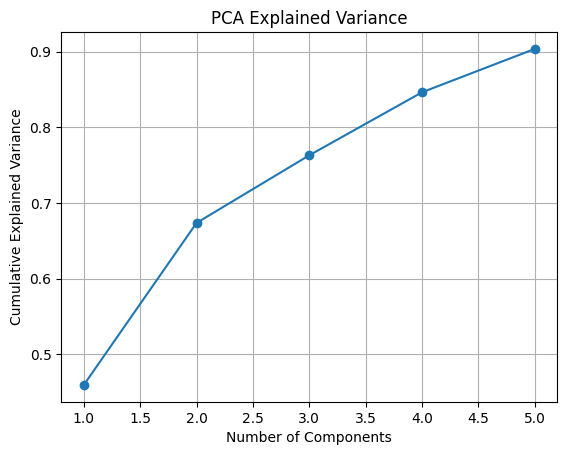

In [26]:
"""
Engineered team-season feature dataset
PCA to reduce correlated metrics - 90% var preserved
"""
df = pd.read_csv("../data/processed/team_season_features_games_only.csv")
df = df.fillna(df.mean(numeric_only=True))

df["season"] = df["season"].astype(str).str.replace(".0", "", regex=False)
df = df[df["season"].str.isnumeric()]

exclude_cols = ["season", "team"]
for col in ["coachId"]:
    if col in df.columns:
        exclude_cols.append(col)

pca_proc = PCAProcessor(n_components=0.9)  # Retain 90% variance
df_pca = pca_proc.fit_transform(df, exclude_cols=exclude_cols)

os.makedirs("../data/processed", exist_ok=True)
df_pca.to_csv("../data/processed/pca_team_season_features.csv", index=False)

print("\nExplained Variance by Principal Components:")
print(pca_proc.explained_variance())
pca_proc.plot_variance()
